In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from scipy.optimize import minimize, least_squares

# Load test samples
from aeons.tools import pickle_in
samples_g_1, samples_c_1, samples_w_1 = pickle_in("../test_samples/samples_1.pickle")

from aeons.covariance import logX_mu, logX_Sigmainv, points_at_iteration, X_mu, X_Sigma, X_Sigmainv, data_at_iteration
from aeons.true_distribution import generate_Xs, nk_dead, nk_dead_live, nk_live
from aeons.bayes import logPr_bayes, logPr_laplace, logPr_gaussian, minimise_ls, minimise_bayes, minimise_gaussian
from aeons.likelihoods import likelihood, linear_like, quad_like, log_like, simple_like, middle_like, full_like
linear, quad, log = linear_like(), quad_like(), log_like()
simple, middle, full = simple_like(), middle_like(), full_like()
from models import LS, CG

### **Cauchy evidence**

In [2]:
def cauchy(X, theta=1):
    return np.log(theta/(theta**2 + X**2))

In [36]:
nk = nk_dead_live(500, 500)
# nk = nk_dead(500, 500)
mean_X = X_mu(nk)
covinv_X = X_Sigmainv(nk)

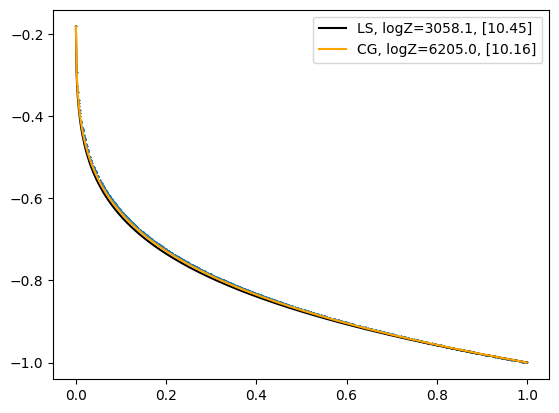

In [56]:
X = generate_Xs(nk)
theta_true = 10
y = simple.func(X, theta_true)
ls = LS(y, simple, mean_X)
cg = CG(y, simple, mean_X, covinv_X)
theta_l = ls.minimise(theta_true)
theta_c = cg.minimise(theta_true)
plt.plot(X, y, 'x', ms=1)
plt.plot(simple.inverse(y, theta_l), y, color='black', ms=1, label=f'LS, logZ={ls.logZ(theta_l):.1f}, {np.round(theta_l, 2)}')
plt.plot(simple.inverse(y, theta_c), y, color='orange', ms=1, label=f'CG, logZ={cg.logZ(theta_c):.1f}, {np.round(theta_c, 2)}')
plt.legend();

In [50]:
print(cg.covtheta(theta_c))
print(ls.covtheta(theta_l))
cg.logZ(theta_c, 1)
ls.logZ(theta_l, 1);

[[0.02933173]]
[[8.88788238e-05]]
logPr_max: 6103.086628706712, Hessian: -1.764542738055597
logPr_max: 3321.8404459716194, Hessian: -13.208173444538312


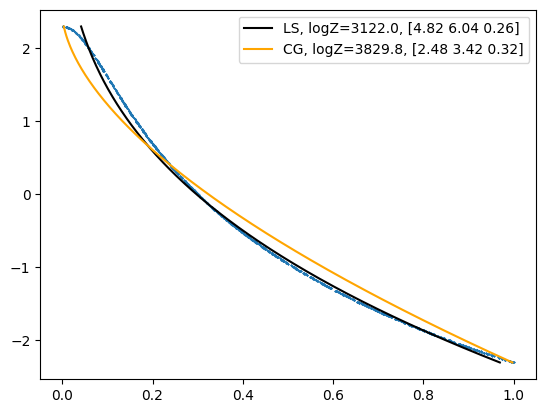

In [42]:
X = generate_Xs(nk)
y = cauchy(X, 0.1)
ls = LS(y, full, mean_X)
cg = CG(y, full, mean_X, covinv_X)
x0 = [4, 8, 0.1]
theta_l = ls.minimise(x0)
theta_c = cg.minimise(x0)
plt.plot(X, y, 'x', ms=1)
plt.plot(full.inverse(y, theta_l), y, color='black', ms=1, label=f'LS, logZ={ls.logZ(theta_l):.1f}, {np.round(theta_l, 2)}')
plt.plot(full.inverse(y, theta_c), y, color='orange', ms=1, label=f'CG, logZ={cg.logZ(theta_c):.1f}, {np.round(theta_c, 2)}')
plt.legend();

In [27]:
print(cg.covtheta(theta_c)[1,1])
print(ls.covtheta(theta_l)[1,1])

0.06077918849691512
0.07375692089688599


(-2.5, -1.5)

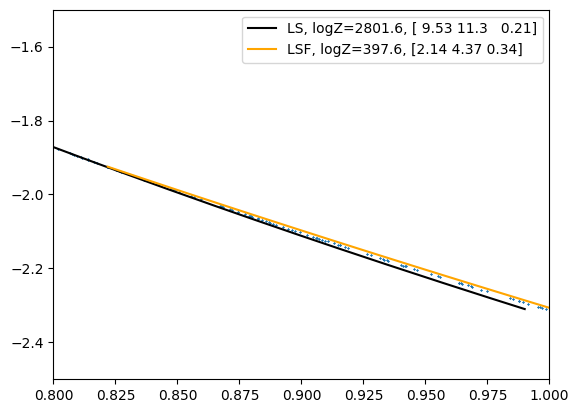

In [20]:
X = generate_Xs(nk)
y = cauchy(X, 0.1)
ls = LS(y, full, mean_X)
lsf = LS(y[:100], full, mean_X[:100])
x0 = [8, 10, 0.1]
theta_l = ls.minimise(x0)
theta_lf = lsf.minimise(x0)
theta_l, theta_lf
plt.plot(X, y, 'x', ms=1)
plt.plot(full.inverse(y, theta_l), y, color='black', ms=1, label=f'LS, logZ={ls.logZ(theta_l):.1f}, {np.round(theta_l, 2)}')
plt.plot(full.inverse(y[:100], theta_lf), y[:100], color='orange', ms=1, label=f'LSF, logZ={lsf.logZ(theta_lf):.1f}, {np.round(theta_lf, 2)}')
plt.legend()
plt.xlim(0.8, 1)
plt.ylim(-2.5, -1.5)

### **Set prefactors equal and compare evidence**

In [ ]:
nk = nk_dead_live(nlive=500, ndead=500)
mean_X = X_mu(nk)
covinv_X = X_Sigmainv(nk)

(-1428.3873847910795, -1385.4235483397215)

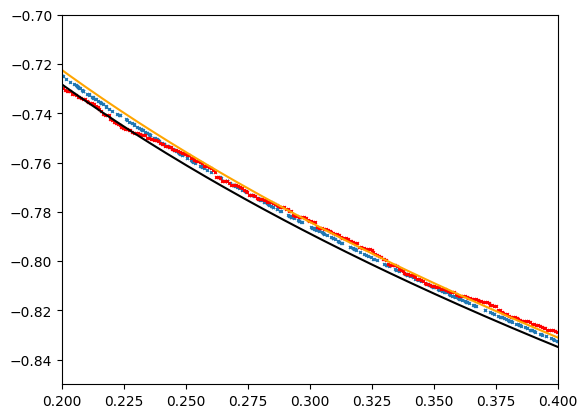

In [ ]:
like = simple
theta_true = 10
X = generate_Xs(nk)
y = like.func(X, theta_true)
ls = LS(y, like, mean_X, covinv_X)
cg = CG(y, like, mean_X, covinv_X)
theta_l = ls.minimise(theta_true)
theta_c = cg.minimise(theta_true)
Xstar = like.inverse(y, theta_c)
reg = - np.sum(np.log(abs(like.prime(Xstar, theta_c))))
norml = - 0.5 * ls.N * np.log(ls.s(theta_l)**2)
normc = 0.5 * cg.logdet_inv
logZlf = ls.logZ(theta_l) - norml
logZcf = cg.logZ(theta_c) - normc - reg
plt.plot(X, y, 'x', ms=2)
plt.plot(mean_X, y, 'x', ms=2, color='red')
plt.plot(like.inverse(y, theta_c), y, color='orange')
plt.plot(like.inverse(y, theta_l), y, color='black')
plt.xlim(0.2, 0.4);
plt.ylim(-0.85, -0.7);
logZlf, logZcf

In [ ]:
-0.5 * ls.N * np.log(ls.s(theta_l)**2), 0.5 * cg.logdet_inv

(4684.861693158646, 6961.003282741954)